
Welcome to the Error Analysis Workbook. As usual, let's start with importing the libraries we will need.

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 50)

from matplotlib import pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style('darkgrid')

import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.simplefilter(action='ignore', category=ConvergenceWarning)

## 1. Preparing the data
Let's start with reading in the base_df which is the cleared house_df from the last class.

In [2]:
base_df = pd.read_csv('./base_df.csv')

Then, we can proceed to select features and target.

In [3]:
# Create separate object for target variable
y = base_df.tx_price

# Create separate object for input features
X = base_df.drop('tx_price', axis=1)

We should import libraries we will use for ML task.

In [4]:
# Function for splitting training and test set
from sklearn.model_selection import train_test_split

# For standardization
from sklearn.preprocessing import StandardScaler

# Import Regularized Regression algorithms
from sklearn.linear_model import Lasso, Ridge, ElasticNet

# Import Tree Ensemble algorithms
from sklearn.ensemble import RandomForestRegressor

Many resources will tell you, you don't need to split your data into test and training, but if you have enough data it is always better to split it.

In [5]:
# Split X and y into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size=0.2,
                                                   random_state=1234)

### Preparing the Pipeline
Redoing some of the pipeline work we did before.

In [6]:
# Function for creating model pipelines
from sklearn.pipeline import make_pipeline

Creating pipelines for the four ML algorithm we will be using.

In [7]:
# Create pipelines dictionary
pipelines = {
    'lasso' : make_pipeline(StandardScaler(), Lasso(random_state=123)),
    'ridge' : make_pipeline(StandardScaler(), Ridge(random_state=123)),
    'enet'  : make_pipeline(StandardScaler(), ElasticNet(random_state=123)),
    'rf'    : make_pipeline(StandardScaler(), RandomForestRegressor(random_state=123))
}

### Prepating the Hyperparameter Grid
Similarly, we prepare the hyperparameter grid again.

In [8]:
# Lasso hyperparameters
lasso_hyperparameters = { 
    'lasso__alpha' : [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10] 
}

# Ridge hyperparameters
ridge_hyperparameters = { 
    'ridge__alpha': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10]  
}

# Elastic Net hyperparameters
enet_hyperparameters = { 
    'elasticnet__alpha': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10],                        
    'elasticnet__l1_ratio' : [0.1, 0.3, 0.5, 0.7, 0.9]  
}

# Random forest hyperparameters
rf_hyperparameters = { 
    'randomforestregressor__n_estimators' : [100, 200],
    'randomforestregressor__max_depth': [5, 10, 20] 
}


In [9]:
# Create hyperparameters dictionary
hyperparameters = {
    'rf' : rf_hyperparameters,
    'lasso' : lasso_hyperparameters,
    'ridge' : ridge_hyperparameters,
    'enet' : enet_hyperparameters
}

## 2. Cross Validation: K-Fold
Now we can explore cross validation in depth. First, we import the cross_val_score.

In [10]:
from sklearn.model_selection import cross_val_score

Remember how we trained the fitted_models with a for loop? We will do the same but for scores.

In [11]:
# Create empty dictionary called fitted_models
fitted_model_scores_1 = {}

In [12]:
# Loop through model pipelines, tuning each one and saving it to fitted_models
for name, pipeline in pipelines.items():
    scores = cross_val_score(pipeline, X_train, y_train, cv=5)
    
    # Store model in fitted_models[name] 
    fitted_model_scores_1[name] = scores
    
    # Print '{name} has been fitted'
    print(name, 'has been fitted.')

lasso has been fitted.
ridge has been fitted.
enet has been fitted.
rf has been fitted.


Let's print out the scores and have a look.

In [13]:
fitted_model_scores_1

{'lasso': array([0.15975254, 0.48001185, 0.39938846, 0.47292976, 0.48761669]),
 'ridge': array([0.16610518, 0.48022396, 0.40262017, 0.47286842, 0.48850554]),
 'enet': array([0.34223388, 0.44537574, 0.44792471, 0.43065937, 0.4702253 ]),
 'rf': array([0.78695297, 0.77012498, 0.83166131, 0.85343169, 0.82879723])}

Let's see how each fold looks like for different models.

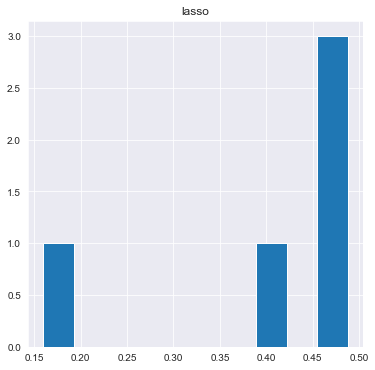

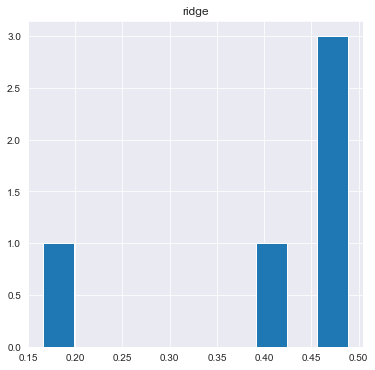

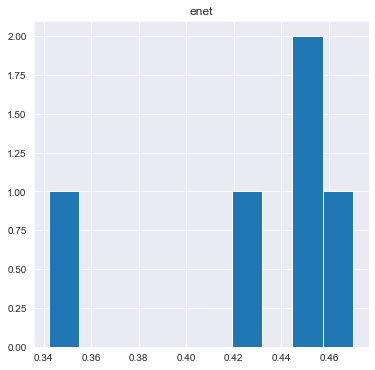

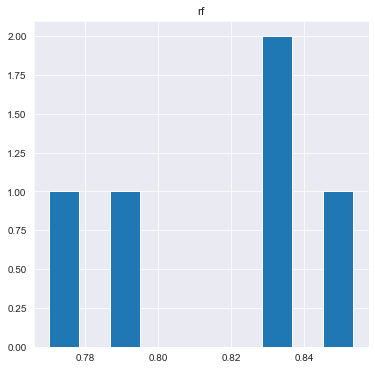

In [14]:
for name in pipelines.items():
    fig = plt.figure(figsize=(6,6))
    plt.hist(fitted_model_scores_1[name[0]])
    plt.title(name[0])

Let's learn how to increase the k-fold.

In [15]:
# Create empty dictionary called fitted_models
fitted_model_scores_2 = {}

In [16]:
# Loop through model pipelines, tuning each one and saving it to fitted_models
for name, pipeline in pipelines.items():
    scores = cross_val_score(pipeline, X_train, y_train, cv=10)
    
    # Store model in fitted_models[name] 
    fitted_model_scores_2[name] = scores
    
    # Print '{name} has been fitted'
    print(name, 'has been fitted.')

lasso has been fitted.
ridge has been fitted.
enet has been fitted.
rf has been fitted.


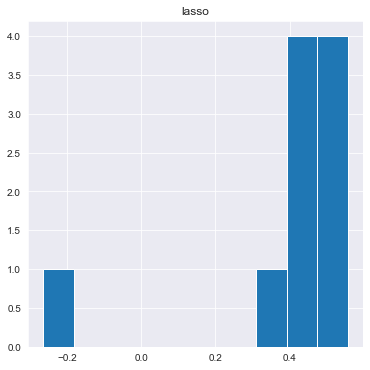

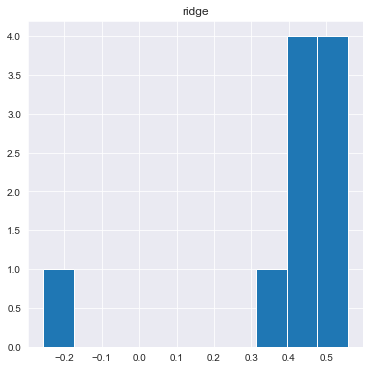

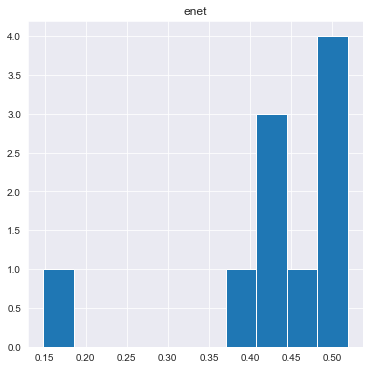

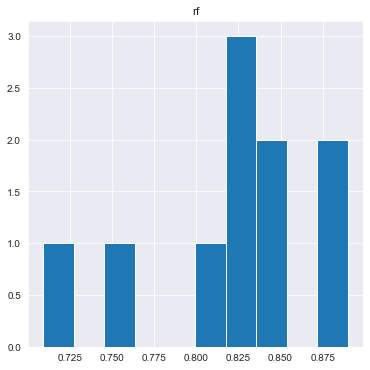

In [17]:
for name in pipelines.items():
    fig = plt.figure(figsize=(6,6))
    plt.hist(fitted_model_scores_2[name[0]])
    plt.title(name[0])

In [18]:
fitted_model_scores_2

{'lasso': array([ 0.54631978, -0.26425775,  0.42548032,  0.55673797,  0.46628121,
         0.38466995,  0.43394662,  0.51951401,  0.44292146,  0.54918932]),
 'ridge': array([ 0.54633541, -0.25561986,  0.42549255,  0.55672907,  0.46779768,
         0.38571837,  0.43367191,  0.52016423,  0.44298798,  0.55072031]),
 'enet': array([0.49322344, 0.14822993, 0.41462816, 0.48855748, 0.48695942,
        0.41520358, 0.40693787, 0.46485891, 0.43773549, 0.5192369 ]),
 'rf': array([0.82478487, 0.75625198, 0.70936966, 0.84524761, 0.87465912,
        0.80344629, 0.88981295, 0.82766739, 0.83067983, 0.83648088])}

## 3. Cross Validation with Multiple Metrics
We can also pass different or multiple metrics to Cross Validation. We do this by importing cross_validate function.

In [19]:
from sklearn.model_selection import cross_validate

Let's define what scoring metric we want to cross validate the model with.

In [20]:
scoring = ['neg_mean_absolute_error']

In [21]:
# Create empty dictionary called fitted_models
fitted_model_scores_3 = {}

In [22]:
# Loop through model pipelines, tuning each one and saving it to fitted_models
for name, pipeline in pipelines.items():
    scores = cross_validate(pipeline, X_train, y_train, scoring=scoring, cv=3)
    
    # Store model in fitted_models[name] 
    fitted_model_scores_3[name] = scores
    
    # Print '{name} has been fitted'
    print(name, 'has been fitted.')

lasso has been fitted.
ridge has been fitted.
enet has been fitted.
rf has been fitted.


In [23]:
fitted_model_scores_3

{'lasso': {'fit_time': array([0.04013705, 0.03944993, 0.03939509]),
  'score_time': array([0.00283194, 0.00327826, 0.003088  ]),
  'test_neg_mean_absolute_error': array([-88413.07217754, -90007.89574623, -92387.82389343])},
 'ridge': {'fit_time': array([0.00876427, 0.00746608, 0.0073452 ]),
  'score_time': array([0.0032568 , 0.00270581, 0.00319886]),
  'test_neg_mean_absolute_error': array([-88224.08978475, -89961.95976848, -92208.47454546])},
 'enet': {'fit_time': array([0.00907493, 0.00724626, 0.00798297]),
  'score_time': array([0.00274611, 0.0026648 , 0.002882  ]),
  'test_neg_mean_absolute_error': array([-88020.82230937, -89883.49033678, -94598.97775979])},
 'rf': {'fit_time': array([0.85999203, 0.81158781, 0.84143686]),
  'score_time': array([0.0178318 , 0.01601195, 0.01247787]),
  'test_neg_mean_absolute_error': array([-51592.72839034, -44965.49754527, -50713.87923387])}}

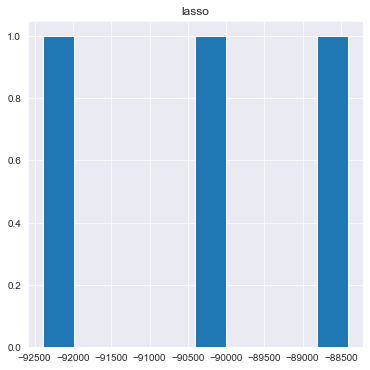

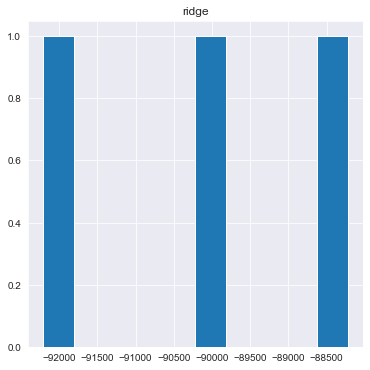

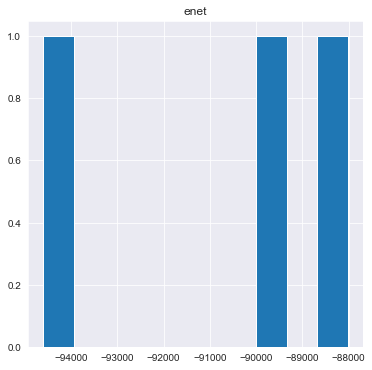

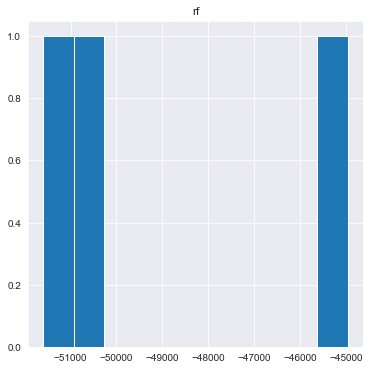

In [24]:
for name in pipelines.items():
    fig = plt.figure(figsize=(6,6))
    plt.hist((fitted_model_scores_3[name[0]]['test_neg_mean_absolute_error']))
    plt.title(name[0])

Here is a sample with multiple metrics.

In [25]:
scoring = ['neg_mean_absolute_error', 'neg_mean_squared_error']

In [26]:
# Create empty dictionary called fitted_models
fitted_model_scores_4 = {}

In [27]:
# Loop through model pipelines, tuning each one and saving it to fitted_models
for name, pipeline in pipelines.items():
    scores = cross_validate(pipeline, X_train, y_train, scoring=scoring, cv=3)
    
    # Store model in fitted_models[name] 
    fitted_model_scores_4[name] = scores
    
    # Print '{name} has been fitted'
    print(name, 'has been fitted.')

lasso has been fitted.
ridge has been fitted.
enet has been fitted.
rf has been fitted.


In [28]:
fitted_model_scores_4

{'lasso': {'fit_time': array([0.03495312, 0.03885889, 0.03664207]),
  'score_time': array([0.00305605, 0.00346708, 0.0034399 ]),
  'test_neg_mean_absolute_error': array([-88413.07217754, -90007.89574623, -92387.82389343]),
  'test_neg_mean_squared_error': array([-1.68605738e+10, -1.28043719e+10, -1.35176446e+10])},
 'ridge': {'fit_time': array([0.00812507, 0.00675607, 0.00666809]),
  'score_time': array([0.0029521 , 0.00297093, 0.00297093]),
  'test_neg_mean_absolute_error': array([-88224.08978475, -89961.95976848, -92208.47454546]),
  'test_neg_mean_squared_error': array([-1.66621655e+10, -1.27788700e+10, -1.34733543e+10])},
 'enet': {'fit_time': array([0.00879383, 0.00821614, 0.00784707]),
  'score_time': array([0.00306726, 0.00332284, 0.00333881]),
  'test_neg_mean_absolute_error': array([-88020.82230937, -89883.49033678, -94598.97775979]),
  'test_neg_mean_squared_error': array([-1.37464994e+10, -1.26501721e+10, -1.40769198e+10])},
 'rf': {'fit_time': array([0.82082033, 0.7161181 ,

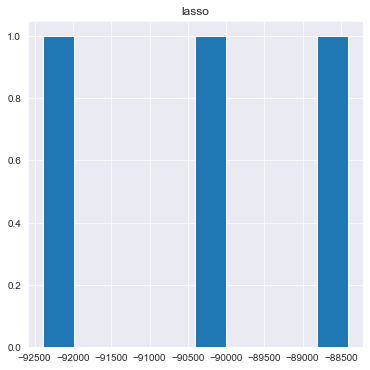

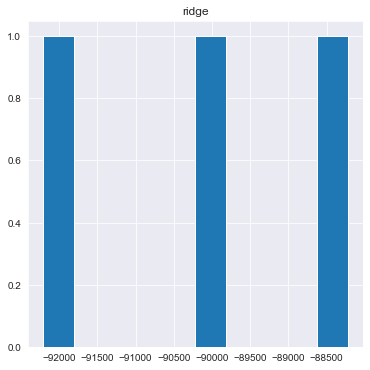

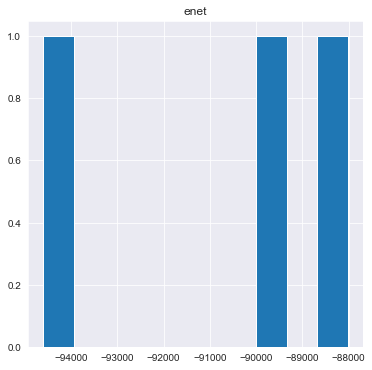

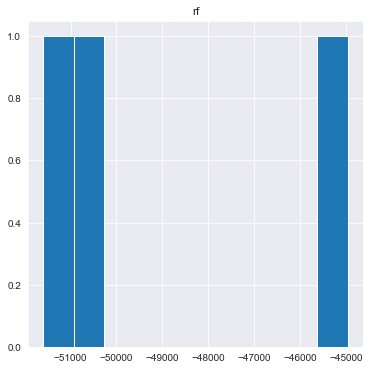

In [29]:
for name in pipelines.items():
    fig = plt.figure(figsize=(6,6))
    plt.hist(fitted_model_scores_4[name[0]]['test_neg_mean_absolute_error'])
    plt.title(name[0])

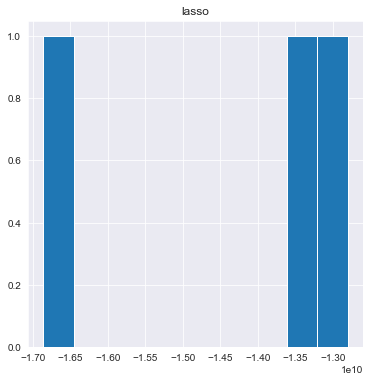

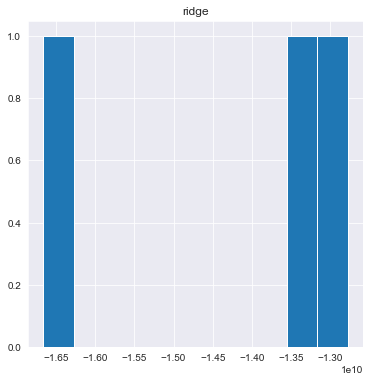

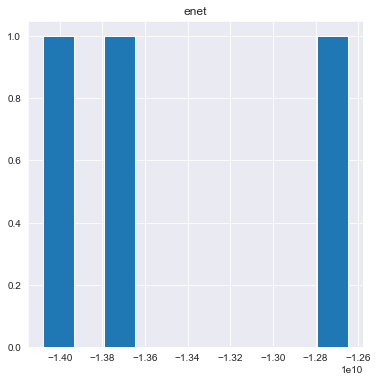

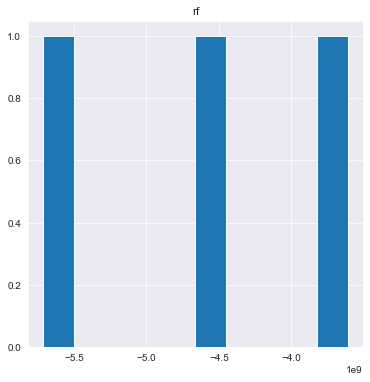

In [30]:
for name in pipelines.items():
    fig = plt.figure(figsize=(6,6))
    plt.hist(fitted_model_scores_4[name[0]]['test_neg_mean_squared_error'])
    plt.title(name[0])

You can view the full list of scorers as follows.

In [31]:
import sklearn
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_weighted',
 'v_measure_score']

## 4. GridSearchCV with Emphasis on CV
Now that we understand CV better, let's revisit GridSearchCV and see what else we can work on.

In [32]:
# Helper for cross-validation
from sklearn.model_selection import GridSearchCV

Just a reminder on how the GridSearchCV works.

In [33]:
# Create empty dictionary called fitted_models
fitted_models_1 = {}
fitted_models_scores_1 = {}

In [34]:
# Loop through model pipelines, tuning each one and saving it to fitted_models
for name, pipeline in pipelines.items():
    model = GridSearchCV(pipeline, hyperparameters[name], cv=10)
    
    # Fit model on X_train, y_train
    model.fit(X_train, y_train)
    
    # Store model in fitted_models[name] 
    fitted_models_1[name] = model
    fitted_models_scores_1[name] = model.cv_results_
    
    # Print '{name} has been fitted'
    print(name, 'has been fitted.')

lasso has been fitted.
ridge has been fitted.
enet has been fitted.
rf has been fitted.


In [35]:
fitted_models_scores_1

{'lasso': {'mean_fit_time': array([0.03800941, 0.03439872, 0.03481212, 0.03497357, 0.03516381,
         0.03406255, 0.03560195, 0.03648181, 0.03481658]),
  'std_fit_time': array([0.0023328 , 0.00225269, 0.00193523, 0.00170912, 0.00118601,
         0.00053835, 0.00196446, 0.00169489, 0.001596  ]),
  'mean_score_time': array([0.00224223, 0.00204132, 0.00210767, 0.00221045, 0.00217035,
         0.0020051 , 0.0021209 , 0.00236652, 0.00205884]),
  'std_score_time': array([1.81440461e-04, 1.67702668e-04, 2.38907570e-04, 3.60275640e-04,
         2.13054248e-04, 7.47363719e-05, 1.28336761e-04, 2.77823646e-04,
         9.22713291e-05]),
  'param_lasso__alpha': masked_array(data=[0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10],
               mask=[False, False, False, False, False, False, False, False,
                     False],
         fill_value='?',
              dtype=object),
  'params': [{'lasso__alpha': 0.001},
   {'lasso__alpha': 0.005},
   {'lasso__alpha': 0.01},
   {'lasso__alpha': 0

Let's try adding more than one evaluation metric to the GridSearchCV.

In [36]:
scoring = ['neg_mean_absolute_error', 'neg_mean_squared_error']

In [37]:
# Create empty dictionary called fitted_models
fitted_models_2 = {}
fitted_models_scores_2 = {}

In [38]:
# Loop through model pipelines, tuning each one and saving it to fitted_models
for name, pipeline in pipelines.items():
    model = GridSearchCV(pipeline, hyperparameters[name], refit=False, scoring=scoring, cv=3)
    
    # Fit model on X_train, y_train
    model.fit(X_train, y_train)
    
    # Store model in fitted_models[name] 
    fitted_models_2[name] = model
    fitted_models_scores_2[name] = model.cv_results_
    
    # Print '{name} has been fitted'
    print(name, 'has been fitted.')

lasso has been fitted.
ridge has been fitted.
enet has been fitted.
rf has been fitted.


Let's see what the GridSearchCV will return.

In [39]:
model = fitted_models_scores_2['lasso']#.mean_test_neg_mean_absolute_error

In [40]:
model['mean_test_neg_mean_absolute_error']

array([-90272.51506521, -90272.50329633, -90272.48858522, -90272.37089634,
       -90272.22378523, -90271.05901522, -90269.5972724 , -90258.48704832,
       -90244.97317376])

In [41]:
results = fitted_models_scores_2

## 5. Plotting Results
Let's see how to best visualize our results. First, let's start how to narrow down our initial data set. As we have learnt, correlation was a good way to start.

In [43]:
correlations = base_df.corr()*100

<AxesSubplot:>

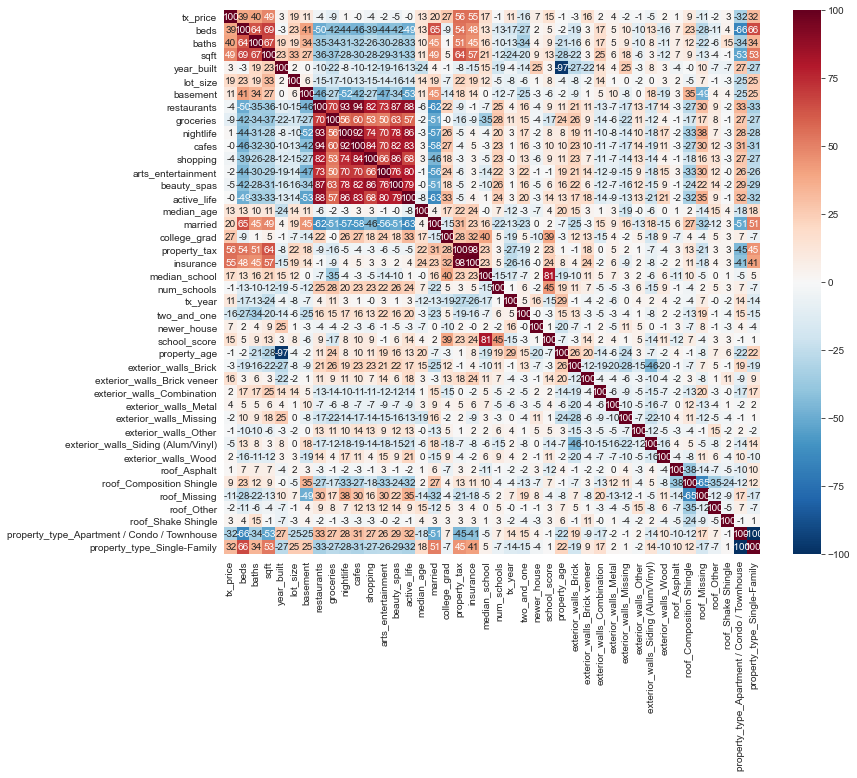

In [44]:
plt.figure(figsize=(12,10))
sns.heatmap(correlations, vmin=-100, annot=True, fmt = '0.0f', cmap='RdBu_r')

This is large set with not much dependency, let's remember what we have learnt from dimensionality reduction.

In [45]:
correlations.sort_values(by='tx_price', ascending=False)

,tx_price,beds,baths,sqft,year_built,lot_size,basement,restaurants,groceries,nightlife,cafes,shopping,arts_entertainment,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,tx_year,two_and_one,newer_house,school_score,property_age,exterior_walls_Brick,exterior_walls_Brick veneer,exterior_walls_Combination,exterior_walls_Metal,exterior_walls_Missing,exterior_walls_Other,exterior_walls_Siding (Alum/Vinyl),exterior_walls_Wood,roof_Asphalt,roof_Composition Shingle,roof_Missing,roof_Other,roof_Shake Shingle,property_type_Apartment / Condo / Townhouse,property_type_Single-Family
tx_price,100.000000,38.768200,39.861521,48.685769,3.415854,18.524405,10.914417,-3.804467,-9.381267,0.922490,-0.168902,-3.952982,-1.989786,-5.435486,-0.139341,12.759898,19.915406,26.865475,55.826613,55.458276,17.198876,-1.498455,11.068008,-15.976537,6.847192,14.864131,-0.542765,-2.701546,16.105963,2.336987,3.628351,-2.289098,-0.940938,-5.055719,1.896003,1.001428,8.918048,-11.466899,-2.059901,2.602652,-32.264149,32.264149
property_tax,55.826613,54.489816,50.786119,64.039269,-8.093367,21.807582,18.270137,-9.414464,-15.580291,-4.682106,-3.730839,-3.449466,-5.627807,-5.174211,-4.815731,22.070725,30.836109,28.418250,100.000000,98.343043,22.879475,2.794810,-26.524295,-18.856321,1.783517,22.552138,1.211880,-0.781606,17.588819,0.103968,5.120360,1.567896,0.609437,-7.410540,-4.192918,3.273532,13.213903,-21.211074,2.750041,2.658554,-44.937201,44.937201
insurance,55.458276,47.939893,45.417799,56.949728,-14.570961,18.873090,13.513540,-0.960205,-8.723509,3.545252,4.696217,2.752236,2.880272,1.970053,4.411942,23.779182,23.291394,32.384314,98.343043,100.000000,22.617764,4.876223,-26.187545,-16.439545,-0.159974,23.549623,7.505379,4.019010,24.196319,-2.222247,5.504490,-9.170190,2.045347,-8.232567,-1.524987,2.256283,10.533637,-18.066080,3.569905,3.338014,-41.013453,41.013453
sqft,48.685769,68.863433,66.907007,100.000000,23.488189,32.583198,27.017512,-35.630572,-37.410351,-28.213486,-30.280876,-27.746691,-29.164351,-31.304191,-33.244139,11.028522,48.786666,5.419810,64.039269,56.949728,21.406966,-11.643283,-24.107270,-19.835366,9.351319,12.876604,-28.470173,-22.117430,3.472529,24.643136,5.744764,17.573044,-6.457749,3.284626,-11.952945,6.860890,9.324665,-12.955524,-3.951918,-1.285012,-52.569940,52.569940
baths,39.861521,64.016793,100.000000,66.907007,18.845579,18.649362,34.405215,-35.195857,-34.084745,-30.761340,-31.987006,-26.206117,-30.298912,-28.318516,-32.814528,9.589945,44.674772,0.873530,50.786119,45.417799,15.632205,-9.815790,-13.290316,-34.019960,4.420348,8.926370,-21.348888,-16.410433,5.809466,16.770944,4.781206,8.879169,-9.562007,8.133553,-11.176424,6.950624,11.893119,-22.089618,-6.456185,15.421941,-33.910858,33.910858
beds,38.768200,100.000000,64.016793,68.863433,-2.820883,22.875672,41.308164,-49.649739,-42.165791,-44.029714,-46.477768,-38.946148,-44.061681,-42.102480,-48.598011,13.346155,64.627631,-8.880031,54.489816,47.939893,13.308375,-13.050665,-17.432885,-26.722499,2.112146,4.867110,-1.598851,-18.516518,2.662222,16.896450,4.911441,9.833287,-9.584948,13.472574,-16.077714,6.660932,23.357559,-27.940251,-11.109265,3.992030,-65.872890,65.872890
property_type_Single-Family,32.264149,65.872890,33.910858,52.569940,-26.951397,25.053371,25.329884,-33.389891,-26.988569,-28.140625,-30.898506,-27.050573,-26.193193,-28.981873,-31.831418,18.325031,50.857739,-6.684907,44.937201,41.013453,4.929324,-6.846316,-13.656081,-14.847132,-4.389083,0.557217,22.468509,-19.444605,8.664848,17.143013,2.057243,1.194030,-2.420394,13.617900,-9.851285,10.229177,11.781749,-17.299058,-6.979223,0.865935,-100.000000,100.000000
college_grad,26.865475,-8.880031,0.873530,5.419810,-1.461140,-7.145830,-13.893247,21.913691,-0.346135,25.748173,27.069959,18.151567,24.103772,18.116348,32.711267,16.959403,-14.909466,100.000000,28.418250,32.384314,39.515917,4.555040,-19.366643,5.492820,-10.492670,38.632548,-3.379854,11.774320,13.286274,-14.712534,3.950539,-1.5439

In [46]:
correlations.sort_values(by='tx_price', ascending=False)[0:9]

,tx_price,beds,baths,sqft,year_built,lot_size,basement,restaurants,groceries,nightlife,cafes,shopping,arts_entertainment,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,tx_year,two_and_one,newer_house,school_score,property_age,exterior_walls_Brick,exterior_walls_Brick veneer,exterior_walls_Combination,exterior_walls_Metal,exterior_walls_Missing,exterior_walls_Other,exterior_walls_Siding (Alum/Vinyl),exterior_walls_Wood,roof_Asphalt,roof_Composition Shingle,roof_Missing,roof_Other,roof_Shake Shingle,property_type_Apartment / Condo / Townhouse,property_type_Single-Family
tx_price,100.000000,38.768200,39.861521,48.685769,3.415854,18.524405,10.914417,-3.804467,-9.381267,0.922490,-0.168902,-3.952982,-1.989786,-5.435486,-0.139341,12.759898,19.915406,26.865475,55.826613,55.458276,17.198876,-1.498455,11.068008,-15.976537,6.847192,14.864131,-0.542765,-2.701546,16.105963,2.336987,3.628351,-2.289098,-0.940938,-5.055719,1.896003,1.001428,8.918048,-11.466899,-2.059901,2.602652,-32.264149,32.264149
property_tax,55.826613,54.489816,50.786119,64.039269,-8.093367,21.807582,18.270137,-9.414464,-15.580291,-4.682106,-3.730839,-3.449466,-5.627807,-5.174211,-4.815731,22.070725,30.836109,28.418250,100.000000,98.343043,22.879475,2.794810,-26.524295,-18.856321,1.783517,22.552138,1.211880,-0.781606,17.588819,0.103968,5.120360,1.567896,0.609437,-7.410540,-4.192918,3.273532,13.213903,-21.211074,2.750041,2.658554,-44.937201,44.937201
insurance,55.458276,47.939893,45.417799,56.949728,-14.570961,18.873090,13.513540,-0.960205,-8.723509,3.545252,4.696217,2.752236,2.880272,1.970053,4.411942,23.779182,23.291394,32.384314,98.343043,100.000000,22.617764,4.876223,-26.187545,-16.439545,-0.159974,23.549623,7.505379,4.019010,24.196319,-2.222247,5.504490,-9.170190,2.045347,-8.232567,-1.524987,2.256283,10.533637,-18.066080,3.569905,3.338014,-41.013453,41.013453
sqft,48.685769,68.863433,66.907007,100.000000,23.488189,32.583198,27.017512,-35.630572,-37.410351,-28.213486,-30.280876,-27.746691,-29.164351,-31.304191,-33.244139,11.028522,48.786666,5.419810,64.039269,56.949728,21.406966,-11.643283,-24.107270,-19.835366,9.351319,12.876604,-28.470173,-22.117430,3.472529,24.643136,5.744764,17.573044,-6.457749,3.284626,-11.952945,6.860890,9.324665,-12.955524,-3.951918,-1.285012,-52.569940,52.569940
baths,39.861521,64.016793,100.000000,66.907007,18.845579,18.649362,34.405215,-35.195857,-34.084745,-30.761340,-31.987006,-26.206117,-30.298912,-28.318516,-32.814528,9.589945,44.674772,0.873530,50.786119,45.417799,15.632205,-9.815790,-13.290316,-34.019960,4.420348,8.926370,-21.348888,-16.410433,5.809466,16.770944,4.781206,8.879169,-9.562007,8.133553,-11.176424,6.950624,11.893119,-22.089618,-6.456185,15.421941,-33.910858,33.910858
beds,38.768200,100.000000,64.016793,68.863433,-2.820883,22.875672,41.308164,-49.649739,-42.165791,-44.029714,-46.477768,-38.946148,-44.061681,-42.102480,-48.598011,13.346155,64.627631,-8.880031,54.489816,47.939893,13.308375,-13.050665,-17.432885,-26.722499,2.112146,4.867110,-1.598851,-18.516518,2.662222,16.896450,4.911441,9.833287,-9.584948,13.472574,-16.077714,6.660932,23.357559,-27.940251,-11.109265,3.992030,-65.872890,65.872890
property_type_Single-Family,32.264149,65.872890,33.910858,52.569940,-26.951397,25.053371,25.329884,-33.389891,-26.988569,-28.140625,-30.898506,-27.050573,-26.193193,-28.981873,-31.831418,18.325031,50.857739,-6.684907,44.937201,41.013453,4.929324,-6.846316,-13.656081,-14.847132,-4.389083,0.557217,22.468509,-19.444605,8.664848,17.143013,2.057243,1.194030,-2.420394,13.617900,-9.851285,10.229177,11.781749,-17.299058,-6.979223,0.865935,-100.000000,100.000000
college_grad,26.865475,-8.880031,0.873530,5.419810,-1.461140,-7.145830,-13.893247,21.913691,-0.346135,25.748173,27.069959,18.151567,24.103772,18.116348,32.711267,16.959403,-14.909466,100.000000,28.418250,32.384314,39.515917,4.555040,-19.366643,5.492820,-10.492670,38.632548,-3.379854,11.774320,13.286274,-14.712534,3.950539,-1.5439

In [47]:
correlations.sort_values(by='tx_price', ascending=True)[0:9]

,tx_price,beds,baths,sqft,year_built,lot_size,basement,restaurants,groceries,nightlife,cafes,shopping,arts_entertainment,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,tx_year,two_and_one,newer_house,school_score,property_age,exterior_walls_Brick,exterior_walls_Brick veneer,exterior_walls_Combination,exterior_walls_Metal,exterior_walls_Missing,exterior_walls_Other,exterior_walls_Siding (Alum/Vinyl),exterior_walls_Wood,roof_Asphalt,roof_Composition Shingle,roof_Missing,roof_Other,roof_Shake Shingle,property_type_Apartment / Condo / Townhouse,property_type_Single-Family
property_type_Apartment / Condo / Townhouse,-32.264149,-65.872890,-33.910858,-52.569940,26.951397,-25.053371,-25.329884,33.389891,26.988569,28.140625,30.898506,27.050573,26.193193,28.981873,31.831418,-18.325031,-50.857739,6.684907,-44.937201,-41.013453,-4.929324,6.846316,13.656081,14.847132,4.389083,-0.557217,-22.468509,19.444605,-8.664848,-17.143013,-2.057243,-1.194030,2.420394,-13.617900,9.851285,-10.229177,-11.781749,17.299058,6.979223,-0.865935,100.000000,-100.000000
two_and_one,-15.976537,-26.722499,-34.019960,-19.835366,-14.240803,-5.938640,-24.775087,16.208406,15.328557,16.654462,15.524500,12.723382,21.657250,15.851595,19.773279,-3.128884,-23.456405,5.492820,-18.856321,-16.439545,-6.971300,5.565572,4.863644,100.000000,-0.434333,-3.327383,14.853924,13.366702,-3.284106,-4.960232,-3.044991,-4.012248,0.556643,-7.783174,2.482037,-2.476772,-12.750648,19.226715,-0.581841,-3.652100,14.847132,-14.847132
roof_Missing,-11.466899,-27.940251,-22.089618,-12.955524,10.316940,6.933220,-49.016465,30.166819,16.893917,38.101333,29.602560,15.503693,30.393530,21.714402,35.459751,-13.702973,-31.718020,-4.199882,-21.211074,-18.066080,-4.818784,1.976279,7.140152,19.226715,7.927714,-4.390177,-8.128760,7.156120,-7.849128,20.109104,-12.664295,-11.827324,-1.221813,-5.185658,10.503074,-13.544482,-65.010216,100.000000,-12.379905,-8.728645,17.299058,-17.299058
groceries,-9.381267,-42.165791,-34.084745,-37.410351,-22.036536,-17.435020,-26.902473,70.082901,100.000000,56.475860,60.243995,52.580472,50.180661,62.646019,57.365593,-1.977023,-50.828402,-0.346135,-15.580291,-8.723509,-35.352375,27.521234,11.384649,15.328557,-3.565816,-16.902887,23.937787,25.830983,9.353894,-13.732175,-6.311906,-22.293821,10.982708,-11.519787,4.342924,-1.245090,-16.960121,16.893917,8.112665,-0.710734,26.988569,-26.988569
beauty_spas,-5.435486,-42.102480,-28.318516,-31.304191,-16.270634,-16.444254,-33.718864,86.830970,62.646019,77.811929,82.316249,86.125726,75.889666,100.000000,78.641095,-0.024657,-51.175528,18.116348,-5.174211,1.970053,-9.801907,26.453326,0.519985,15.851595,-4.653574,6.187029,15.727772,22.376703,6.462545,-11.529370,-6.837351,-15.561152,12.185886,-15.380230,8.554369,-0.704129,-23.860810,21.714402,14.088461,-1.642257,28.981873,-28.981873
exterior_walls_Siding (Alum/Vinyl),-5.055719,13.472574,8.133553,3.284626,8.431115,0.415493,18.225458,-17.083059,-11.519787,-18.077700,-18.510641,-14.452807,-18.142740,-15.380230,-21.024028,-6.066574,17.863247,-17.896693,-7.410540,-8.232567,-6.120598,-15.492809,2.385509,-7.783174,0.390351,-14.156601,-7.494431,-45.774522,-9.795777,-14.795295,-15.805146,-22.155358,-11.634315,100.000000,-15.945462,3.637527,5.391716,-5.185658,-7.880860,2.282988,-13.617900,13.617900
shopping,-3.952982,-38.946148,-26.206117,-27.746691,-11.984802,-14.546418,-27.161334,81.867598,52.580472,74.332511,83.689855,100.000000,65.549173,86.125726,67.869530,3.466803,-45.620023,18.151567,-3.449466,2.752236,-4.731472,23.036450,-0.147929,12.723382,-5.840536,8.819186,11.453869,22.528520,6.716290,-11.392205,-7.408195,-14.379575,13.391123,-14.452807,4.422652,-1.258824,-17.813281,15.503693,13.394999,-2.510229,27.050573,-27.050573
restaurants,-3.804467,-49.649739,-35.195857,-35.630572,-10.369706,-15.082555,-45.682587,100.000000,70.082901,92.685489,93.785708,81.867598,72.800622,86.830970,88.223062,-6.147347,-61.679836,21.913691,-9.414464,-0.960205,-6.

In [48]:
corr_df = base_df[['tx_price', 'property_tax', 'insurance', 'sqft', 'baths', 'beds', 'property_type_Single-Family']].copy()

We can now get a better behavioural insight from this data set.

In [ ]:
plt.figure(figsize=(12,10))
g = sns.PairGrid(corr_df, diag_sharey=False)
g.map_upper(sns.scatterplot, s=15)
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot, lw=2)

### Visualizing the prediction results from multiple regression models
In your class project, you would need to visualize the prediction results from multiple models.

In [ ]:
from sklearn.model_selection import cross_val_predict

Here is a simplified function from sklearn.

In [ ]:
def plot_regression_results(ax, y_true, y_pred, title, scores):
    """Scatter plot of the predicted vs true targets."""
    ax.plot([y_true.min(), y_true.max()],
            [y_true.min(), y_true.max()],
            '--r', linewidth=2)
    ax.scatter(y_true, y_pred, alpha=0.2)

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.spines['left'].set_position(('outward', 10))
    ax.spines['bottom'].set_position(('outward', 10))
    ax.set_xlim([y_true.min(), y_true.max()])
    ax.set_ylim([y_true.min(), y_true.max()])
    ax.set_xlabel('Measured')
    ax.set_ylabel('Predicted')
    extra = plt.Rectangle((0, 0), 0, 0, fc="w", fill=False,
                          edgecolor='none', linewidth=0)
    ax.legend([extra], [scores], loc='upper left')
    title = title
    ax.set_title(title)

We need to create a list of estimators compatible with this function.

In [ ]:
estimators = []

for name, pipeline in pipelines.items():
    estimators.append((name , pipeline))

In [ ]:
estimators

Now we can create an easy to interpret plot to analyze the results.

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(9, 7))
axs = np.ravel(axs)

for ax, (name, est) in zip(axs, estimators):
    score = cross_validate(est, X, y,
                           scoring=['r2', 'neg_mean_absolute_error'],
                           n_jobs=-1, verbose=0)

    y_pred = cross_val_predict(est, X, y, n_jobs=-1, verbose=0)

    plot_regression_results(
        ax, y, y_pred,
        name,
        (r'$R^2={:.2f} \pm {:.2f}$' + '\n' + r'$MAE={:.2f} \pm {:.2f}$')
        .format(np.mean(score['test_r2']),
                np.std(score['test_r2']),
                -np.mean(score['test_neg_mean_absolute_error']),
                np.std(score['test_neg_mean_absolute_error'])))

plt.suptitle('Predictors')
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

👏 Congratulations, you have completed the Error Analysis Workbook!